<center><h1>Ma_Htet_HW2</h1></center>
<br>
<br>

Name: Htet Ma
<br>
Github Username: hswma
<br>
USC ID: 4522446617

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tools.eval_measures import rmse
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

os.chdir('../data/CCPP')

Get the Cycle Power Plant Data Set

In [2]:
df = pd.read_excel('Folds5x2_pp.ods', engine='odf')
print(df)

#Reference: https://stackoverflow.com/questions/17834995/how-to-convert-opendocument-spreadsheets-to-a-pandas-dataframe

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


### (b) Exploring the data

#### i. rows and columns

In [3]:
row_bi = df.shape[0]
col_bi = df.shape[1]

print(f'There are {row_bi} rows in this data set.')
print(f'There are {col_bi} columns in this data set.')
print(f'The columns represent the features (Temperature, Ambient Pressure, Relative Humidity, and Exhaust Vacuum) to predict net hourly electrical energy output of power plant. \nEach row represent the value or observation collected for each feature.')

There are 9568 rows in this data set.
There are 5 columns in this data set.
The columns represent the features (Temperature, Ambient Pressure, Relative Humidity, and Exhaust Vacuum) to predict net hourly electrical energy output of power plant. 
Each row represent the value or observation collected for each feature.


#### ii. pairwise scatterplots of all the varianbles

There are bimodal in AT, V, and PE. RH is right skewed. Only AP is normal. 
When looking at the interaction between predictors, it is very difficult to see a model because the points are all scattered. 
When looking at the interaction between each predictor to response, PE and AT have a linear response, PE and V may have a linear response. 
We will have do analyze deeper into other predictors and response interactions.


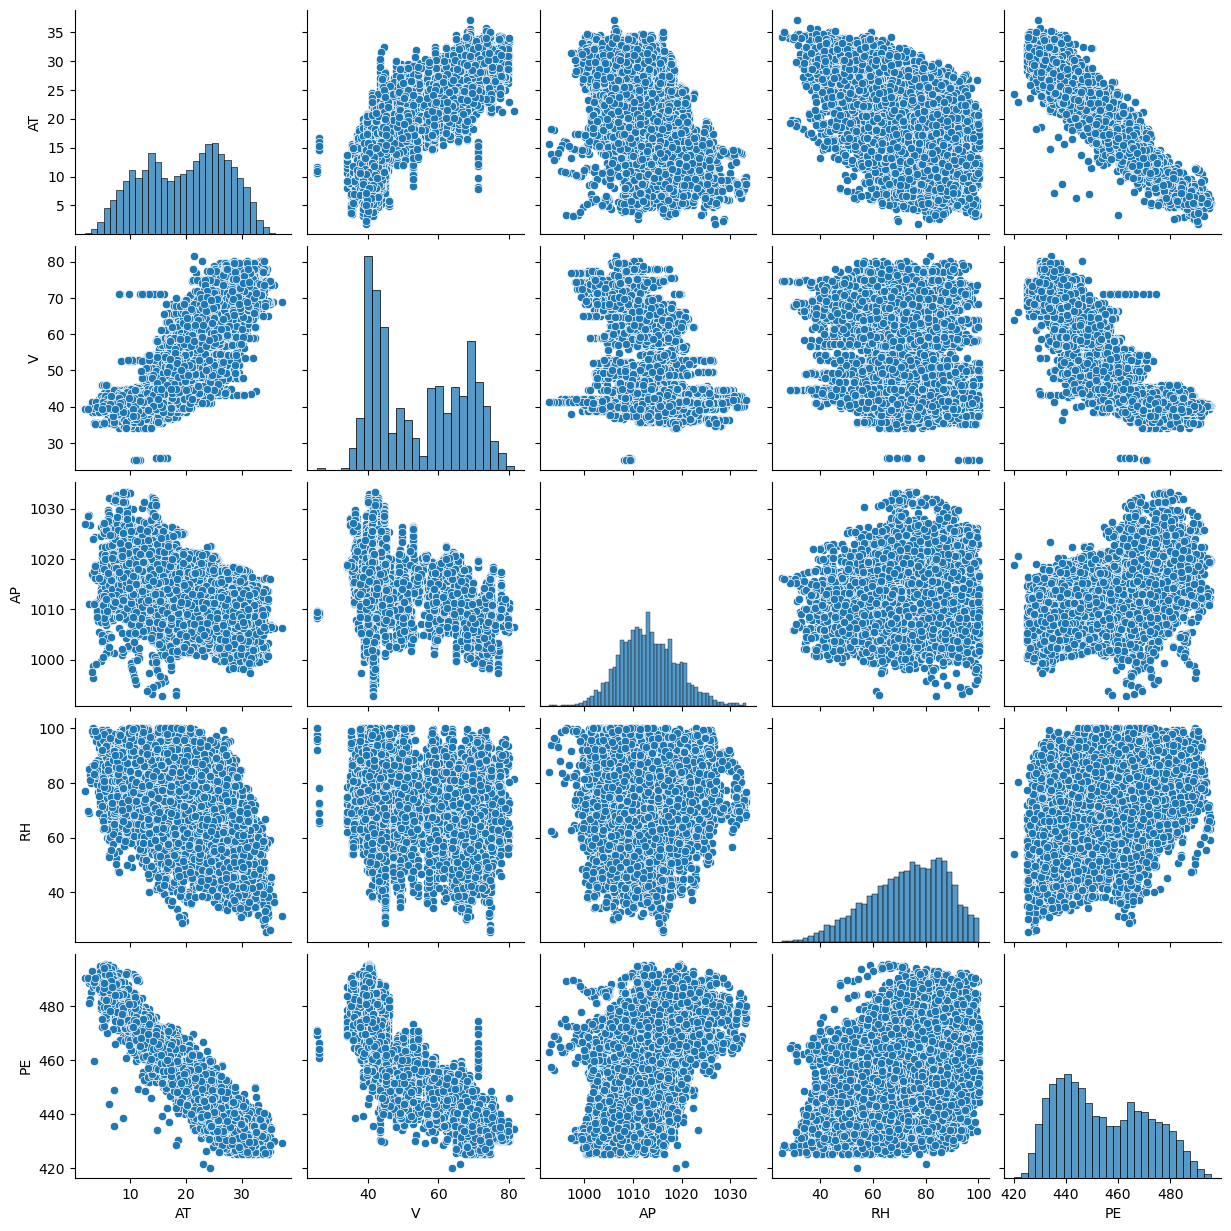

In [4]:
sns.pairplot(df)

print(f'There are bimodal in AT, V, and PE. RH is right skewed. Only AP is normal. \nWhen looking at the interaction between predictors, it is very difficult to see a model because the points are all scattered. \nWhen looking at the interaction between each predictor to response, PE and AT have a linear response, PE and V may have a linear response. \nWe will have do analyze deeper into other predictors and response interactions.')

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
Des_iii = df.describe()
iii_IQR_3 = Des_iii.iloc[6,:]
iii_IQR_1 = Des_iii.iloc[4,:]
iii_IQR_range = iii_IQR_3 - iii_IQR_1
iii_IQR_range.name = 'IQR_range'
DesStat_iii = pd.concat([Des_iii.T,iii_IQR_range], axis=1).T
print(DesStat_iii)

#Reference https://stackoverflow.com/questions/21004993/pandas-concat-series-to-df-as-rows

                    AT            V           AP           RH           PE
count      9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean         19.651231    54.305804  1013.259078    73.308978   454.365009
std           7.452473    12.707893     5.938784    14.600269    17.066995
min           1.810000    25.360000   992.890000    25.560000   420.260000
25%          13.510000    41.740000  1009.100000    63.327500   439.750000
50%          20.345000    52.080000  1012.940000    74.975000   451.550000
75%          25.720000    66.540000  1017.260000    84.830000   468.430000
max          37.110000    81.560000  1033.300000   100.160000   495.760000
IQR_range    12.210000    24.800000     8.160000    21.502500    28.680000


### (c) Simple Linear Regression

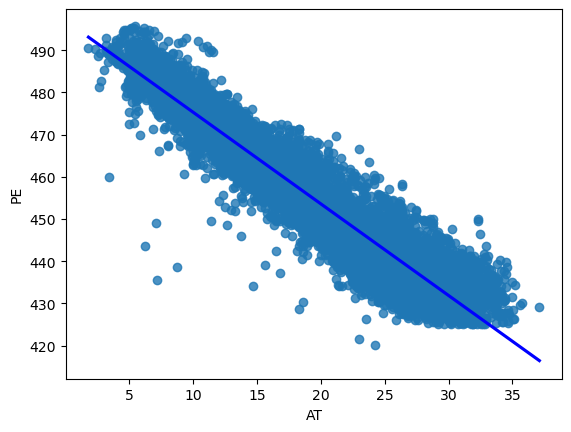

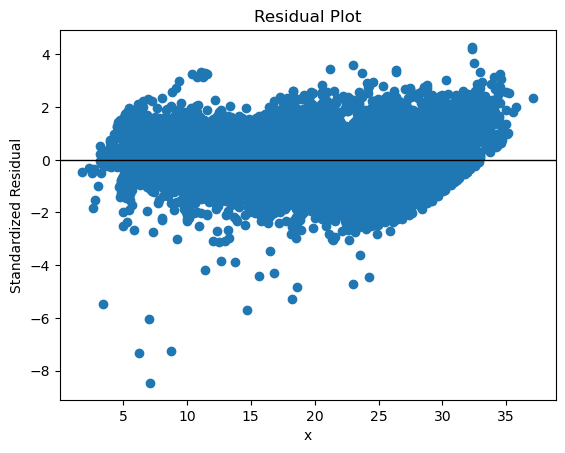

The p - values are 
const    0.0
AT       0.0
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:23:11   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

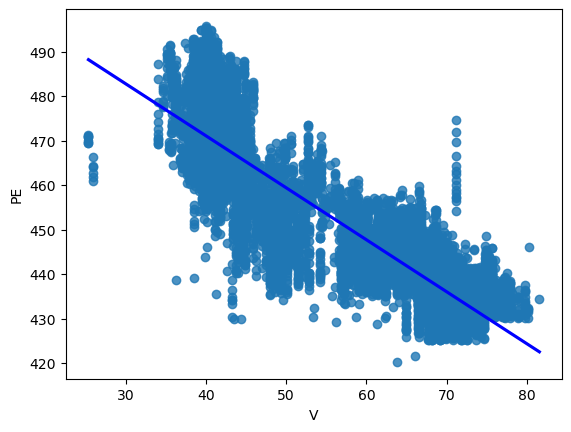

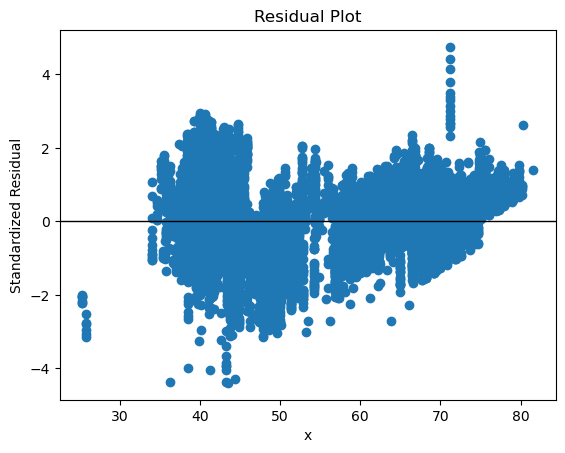

The p - values are 
const    0.0
V        0.0
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:23:12   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

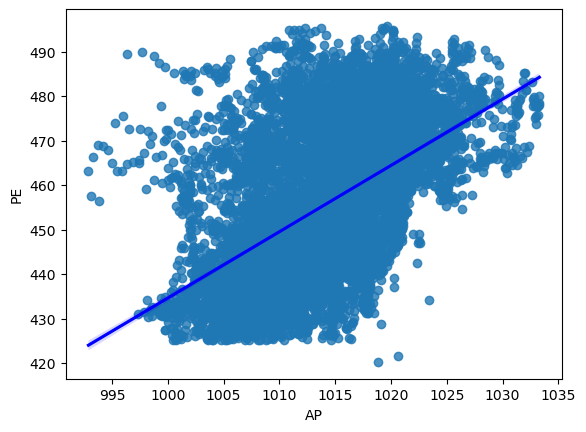

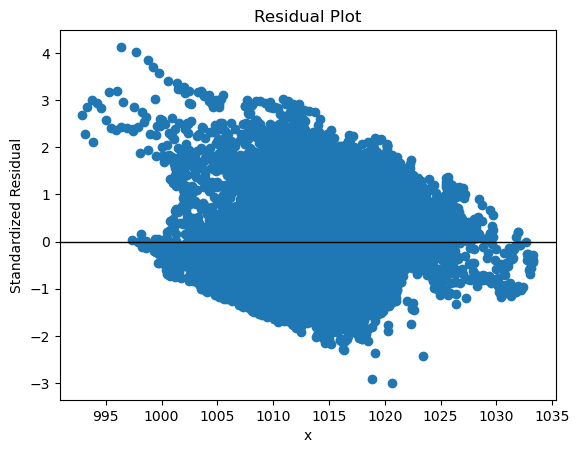

The p - values are 
const    0.0
AP       0.0
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:23:12   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

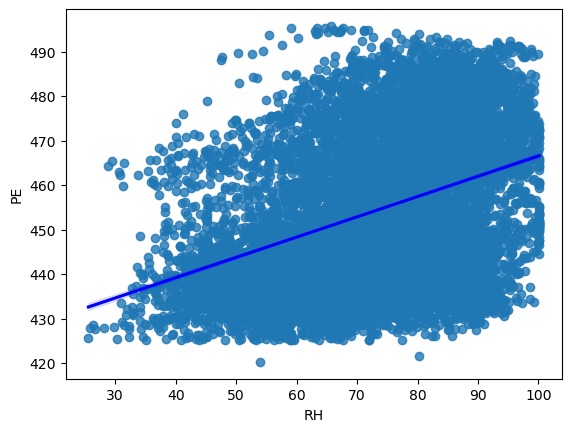

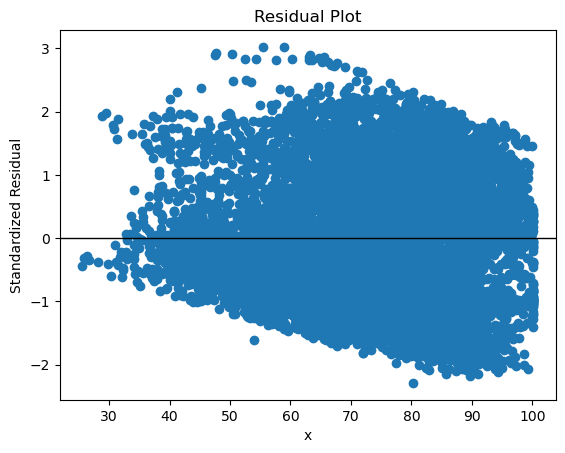

The p - values are 
const    0.0
RH       0.0
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:23:13   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [6]:
c_col = [0, 1, 2, 3]
c_para = []
for c_i in c_col:
    c_x = sm.add_constant(df.iloc[:,c_i])
    c_mod = sm.OLS(df.iloc[:,4],c_x).fit()
    c_sum = c_mod.summary()
    c_para.append(c_mod.params)
    sns.regplot(x=df.iloc[:,c_i], y=df.iloc[:,4], line_kws={"color": "blue"})
    plt.show()
    plt.title('Predictor and Response Plot')
    c_stud_res = c_mod.get_influence().get_resid_studentized_external()
    plt.scatter(df.iloc[:,c_i], c_stud_res)
    plt.xlabel('x')
    plt.ylabel('Standardized Residual')
    plt.title('Residual Plot')
    plt.axhline(y=0, color='black', linewidth=1)
    plt.show()
    print(f'The p - values are \n{c_mod.pvalues}')
    print(c_sum)

In [7]:
print(f'There is statistically significant association between each predictor to the response.')
print(f'After reviewing the residual plots, the outliers I would like to remove from my data observations that are 3 standard deviations away.')

There is statistically significant association between each predictor to the response.
After reviewing the residual plots, the outliers I would like to remove from my data observations that are 3 standard deviations away.


### (d) Multiple Regression

In [8]:
d_x = df.iloc[:,0:4]
d_x = sm.add_constant(d_x)
d_mod = sm.OLS(df.iloc[:,4], d_x).fit()
d_sum = d_mod.summary()
d_para = d_mod.params
print(d_mod.pvalues)
print(d_para)
print(d_sum)
print(f'\n\nWe cannot reject null hypothesis for any predictors because the p value is less than alpha value.')

const     0.000000e+00
AT        0.000000e+00
V        4.375305e-215
AP        5.507109e-11
RH       3.104584e-293
dtype: float64
const    454.609274
AT        -1.977513
V         -0.233916
AP         0.062083
RH        -0.158054
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:23:14   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust       

### (e) 1c Compare to 1d

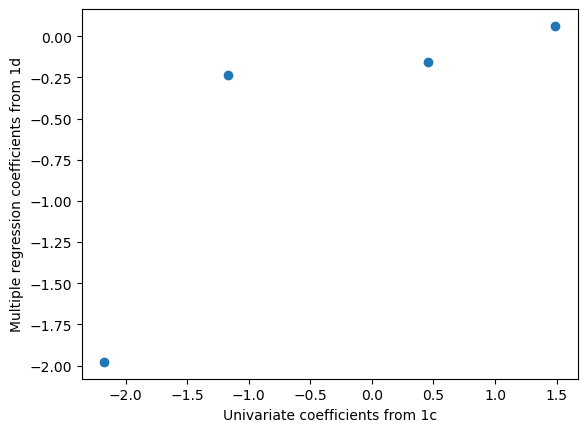

In [9]:
coef_para_1c = [c_para_ele.iloc[1] for c_para_ele in c_para]
coef_para_1d = d_para.iloc[1:]
plt.scatter(coef_para_1c, coef_para_1d, marker='o')
plt.xlabel('Univariate coefficients from 1c')
plt.ylabel('Multiple regression coefficients from 1d')
plt.show()

### (f) Nonlinear Association

In [10]:
f_col = [0, 1, 2, 3]
for f_i in f_col:
    x_1f = df.iloc[:,f_i]
    x_1f_poly = PolynomialFeatures(degree=3)
    x_1f_features = x_1f_poly.fit_transform(x_1f.to_numpy().reshape(-1,1))
    f_mod = sm.OLS(df.iloc[:,4], x_1f_features).fit()
    f_sum = f_mod.summary()
    f_para = f_mod.params
    f_name = x_1f_poly.get_feature_names_out()
    print(f_name)
    print(f'The coefficients are\n {f_para}')
    print(f'The p values are\n {f_mod.pvalues}')
#     print(f_sum)

print(f'\n\nThere is evidence of nonlinear associate because AT beta 2 is -0.1251, V beta 2 is -0.0027, AP beta 2 is -0.0499, RH beta 2 is 0.0321')

['1' 'x0' 'x0^2' 'x0^3']
The coefficients are
 const    492.728143
x1        -0.610346
x2        -0.125138
x3         0.002675
dtype: float64
The p values are
 const     0.000000e+00
x1        7.898147e-07
x2        8.833045e-73
x3       3.652185e-110
dtype: float64
['1' 'x0' 'x0^2' 'x0^3']
The coefficients are
 const    554.146849
x1        -2.144377
x2        -0.002712
x3         0.000134
dtype: float64
The p values are
 const    0.000000
x1       0.000025
x2       0.768497
x3       0.013735
dtype: float64
['1' 'x0' 'x0^2' 'x0^3']
The coefficients are
 const     0.074694
x1       25.255593
x2       -0.049952
x3        0.000025
dtype: float64
The p values are
 const    4.502734e-17
x1       4.502735e-17
x2       3.666705e-17
x3       8.264146e-18
dtype: float64
['1' 'x0' 'x0^2' 'x0^3']
The coefficients are
 const    468.413536
x1        -1.729211
x2         0.032145
x3        -0.000152
dtype: float64
The p values are
 const    0.000000
x1       0.000377
x2       0.000009
x3       0.00

### (g) Interactions of Predictors

In [11]:
x_1g = df.iloc[:,0:4]
x_1g_poly = PolynomialFeatures(degree=2, interaction_only=True)
x_1g_features = x_1g_poly.fit_transform(x_1g)
g_mod = sm.OLS(df.iloc[:,4], x_1g_features).fit()
g_sum = g_mod.summary()
g_para = g_mod.params
g_name = x_1g_poly.get_feature_names_out(['AT','V','AP','RH'])
print(g_name)
print(g_para)
print(g_sum)
print(f'\n\nThere is very little evidence of association of interactions for each of the predictors.')

['1' 'AT' 'V' 'AP' 'RH' 'AT V' 'AT AP' 'AT RH' 'V AP' 'V RH' 'AP RH']
const    685.782468
x1        -4.347014
x2        -7.674858
x3        -0.152355
x4         1.570907
x5         0.020971
x6         0.001759
x7        -0.005230
x8         0.006812
x9         0.000839
x10       -0.001612
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:23:14   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                          

### (h) Improvement

In [12]:
df_h1 = df.sample(frac=0.7, replace=False, weights=None)
df_h1test = df.drop(df_h1.index)

# Multiple regression
h1_xmr = df_h1.iloc[:,0:4]
h1_xmr = sm.add_constant(h1_xmr)
h1_modmr = sm.OLS(df_h1.iloc[:,4], h1_xmr).fit()
h1_summr = h1_modmr.summary()
h1_paramr = h1_modmr.params
predict_train_h1mr = h1_modmr.predict(h1_xmr)
train_mse_h1mr = rmse(df_h1.iloc[:,4], predict_train_h1mr)

h1_xmr_test = df_h1test.iloc[:,0:4]
h1_xmr_test = sm.add_constant(h1_xmr_test)
predict_test_h1mr = h1_modmr.predict(h1_xmr_test)
test_mse_h1mr = rmse(df_h1test.iloc[:,4], predict_test_h1mr)
print(f'The test data MSE is {test_mse_h1mr}')
print(f'The train data MSE is {train_mse_h1mr}')
print(d_sum)


# Interactions
x_h1i = df_h1.iloc[:,0:4]
x_h1polyi = PolynomialFeatures(degree=2)
x_h1featuresi = x_h1polyi.fit_transform(x_h1i)
mod_h1i = sm.OLS(df_h1.iloc[:,4], x_h1featuresi).fit()
sum_h1i = mod_h1i.summary()
para_h1i = mod_h1i.params
name_h1i = x_h1polyi.get_feature_names_out(['AT','V','AP','RH'])
prediction_h1i = mod_h1i.predict(x_h1featuresi)
train_mse_h1i = rmse(df_h1.iloc[:,4], prediction_h1i)

x_test_h1i = df_h1test.iloc[:,0:4]
x_test_h1featuresi = x_h1polyi.fit_transform(x_test_h1i)
mod_test_h1i = sm.OLS(df_h1test.iloc[:,4], x_test_h1featuresi).fit()
predict_test_h1i = mod_test_h1i.predict(x_test_h1featuresi)
test_mse_h1i = rmse(df_h1test.iloc[:,4], predict_test_h1i)
print(f'The test data MSE is {test_mse_h1i}')
print(f'The train data MSE is {train_mse_h1i}')
print(name_h1i)
print(para_h1i)
print(sum_h1i)

The test data MSE is 4.628846053530572
The train data MSE is 4.527036344169419
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:23:14   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [13]:
# Remove insignificant predictors
# Interactions
x_h1i = df_h1.iloc[:,2:4]
x_h1polyi = PolynomialFeatures(degree=2)
x_h1featuresi = x_h1polyi.fit_transform(x_h1i)
mod_h1i = sm.OLS(df_h1.iloc[:,4], x_h1featuresi).fit()
sum_h1i = mod_h1i.summary()
para_h1i = mod_h1i.params
name_h1i = x_h1polyi.get_feature_names_out(['AP','RH'])
prediction_h1i = mod_h1i.predict(x_h1featuresi)
train_mse_h1i = rmse(df_h1.iloc[:,4], prediction_h1i)

x_test_h1i = df_h1test.iloc[:,3:4]
x_test_h1featuresi = x_h1polyi.fit_transform(x_test_h1i)
mod_test_h1i = sm.OLS(df_h1test.iloc[:,4], x_test_h1featuresi).fit()
predict_test_h1i = mod_test_h1i.predict(x_test_h1featuresi)
test_mse_h1i = rmse(df_h1test.iloc[:,4], predict_test_h1i)
print(f'The test data MSE is {test_mse_h1i}')
print(f'The train data MSE is {train_mse_h1i}')
print(name_h1i)
print(para_h1i)
print(sum_h1i)

The test data MSE is 15.639225163342775
The train data MSE is 13.309243840977656
['1' 'AP' 'RH' 'AP^2' 'AP RH' 'RH^2']
const    18449.794403
x1         -37.574662
x2           8.482864
x3           0.019543
x4          -0.008479
x5           0.003505
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     861.8
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:23:14   Log-Likelihood:                -26842.
No. Observations:                6698   AIC:                         5.370e+04
Df Residuals:                    6692   BIC:                         5.374e+04
Df Model:                           5                                         
Covariance Type:       

### (i) KNN

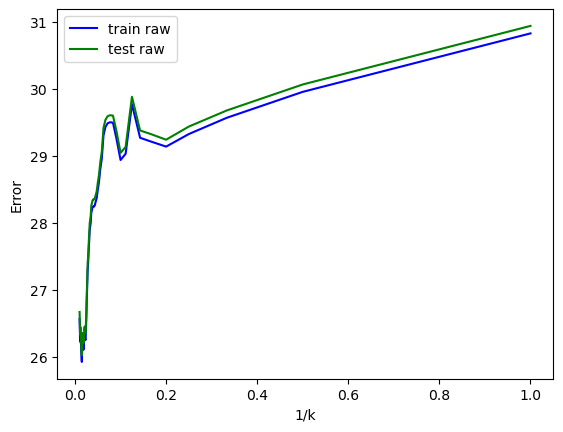

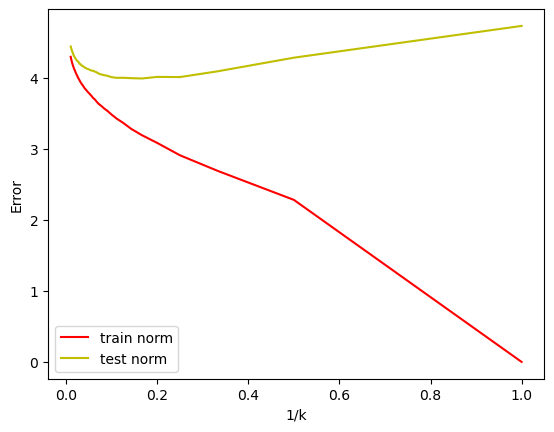

In [14]:
karry_ii = np.arange(1,101,1)
x_train = df_h1.iloc[:,0:4].values
y_train = df_h1.iloc[:,4].values
x_test = df_h1test.iloc[:,0:4].values
y_test = df_h1test.iloc[:,4].values

scaler = MinMaxScaler()
fit_train_i = scaler.fit(x_train)
transform_train_i = scaler.transform(x_train)
fit_test_i = scaler.fit(x_test)
transform_test_i = scaler.transform(x_test)

train_raw = []
test_raw = []
train_norm = []
test_norm = []
for ki in karry_ii:
    neigh = KNeighborsRegressor(n_neighbors=ki)
    mod_train_raw = neigh.fit(x_train,y_train)
    mod_train_norm = neigh.fit(transform_train_i,y_train)
    predict_train_raw = mod_train_raw.predict(x_train)
    predict_test_raw = mod_train_raw.predict(x_test)
    predict_train_norm = mod_train_norm.predict(transform_train_i)
    predict_test_norm = mod_train_norm.predict(transform_test_i)
    mse_train_raw = rmse(y_train, predict_train_raw)
    mse_test_raw = rmse(y_test, predict_test_raw)
    mse_train_norm = rmse(y_train, predict_train_norm)
    mse_test_norm = rmse(y_test, predict_test_norm)
    train_raw.append(mse_train_raw)
    test_raw.append(mse_test_raw)
    train_norm.append(mse_train_norm)
    test_norm.append(mse_test_norm)
    
plt.plot(1/karry_ii, train_raw, 'b-', label='train raw')
plt.plot(1/karry_ii, test_raw, 'g-', label='test raw')
plt.xlabel('1/k')
plt.ylabel('Error')
plt.legend()
plt.show()
plt.plot(1/karry_ii, train_norm, 'r-', label='train norm')
plt.plot(1/karry_ii, test_norm, 'y-', label='test norm')
plt.xlabel('1/k')
plt.ylabel('Error')
plt.legend()
plt.show()

In [15]:
# Best k
mink_raw = np.argmin(test_raw)
print(f'For raw data, most suitable k is {karry_ii[mink_raw]}')
mink_norm = np.argmin(test_norm)
print(f'For normalized data, most suitable k is {karry_ii[mink_norm]}')

For raw data, most suitable k is 67
For normalized data, most suitable k is 6


### (j ) Compare KNN and Linear

In [16]:
#KNN
print(f'The smallest MSE for raw data is {min(test_raw)}')
print(f'The smallest MSE for normalized data is {min(test_norm)}')

#H all predictors
print(f'The test data MSE is {test_mse_h1mr}')

#H non linear association
print(f'The test data MSE is {test_mse_h1i}')

#H regression model removed predictors
print(f'The test data MSE is {test_mse_h1i}')

#The smallest MSE
print(f'The smallest MSE is normalized data with MSE of {min(test_norm)}')

The smallest MSE for raw data is 26.024089517982155
The smallest MSE for normalized data is 3.9915067947393807
The test data MSE is 4.628846053530572
The test data MSE is 15.639225163342775
The test data MSE is 15.639225163342775
The smallest MSE is normalized data with MSE of 3.9915067947393807


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

In [17]:
print(f'Flexible statistical learning method will perform better than inflexible method.')

#Reference: https://stats.stackexchange.com/questions/69237/flexible-and-inflexible-models-in-machine-learning

Flexible statistical learning method will perform better than inflexible method.


### (b) The number of predictors p is extremely large, and the number of observations n is small.

In [18]:
print(f'Flexible statistical learning method will perform worse than inflexible method.')

#Reference: https://stats.stackexchange.com/questions/69237/flexible-and-inflexible-models-in-machine-learning

Flexible statistical learning method will perform worse than inflexible method.


### (c) The relationship between the predictors and response is highly non-linear.

In [19]:
print(f'Flexible statistical learning method will perform better than inflexible method.')

#Reference: https://stats.stackexchange.com/questions/69237/flexible-and-inflexible-models-in-machine-learning

Flexible statistical learning method will perform better than inflexible method.


### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

In [20]:
print(f'Flexible statistical learning method will perform worse than inflexible method.')

#Reference: https://stats.stackexchange.com/questions/69237/flexible-and-inflexible-models-in-machine-learning

Flexible statistical learning method will perform worse than inflexible method.


## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [21]:
from sklearn.metrics.pairwise import euclidean_distances

df_247 = {'x1':[0, 2, 0, 0, -1, 1], 'x2':[3, 0, 1, 1, 0, 1], 'x3':[0, 0, 3, 2, 1, 1], 'y':['red', 'red', 'red', 'green', 'green', 'red']}
df_247 = pd.DataFrame(df_247)

tstpt = [[0, 0, 0]]
x_df_247 = df_247.iloc[:,0:3]
eudist = euclidean_distances(x_df_247, tstpt)
print(f'The euclidean distance is \n{eudist}')

The euclidean distance is 
[[3.        ]
 [2.        ]
 [3.16227766]
 [2.23606798]
 [1.41421356]
 [1.73205081]]


### (b) What is our prediction with K = 1? Why?

In [22]:
from sklearn.neighbors import KNeighborsClassifier

bpred = [[0, 0, 0]]
y_df_247 = df_247.iloc[:,3]
classifier_b = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier_b.fit(x_df_247, y_df_247)
y_pred = classifier_b.predict(bpred)
print(y_pred)

print(f'It is green because the closest observation number 5 is green')

['green']
It is green because the closest observation number 5 is green


C:\Users\htet.ma\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### (c) What is our prediction with K = 3? Why?

In [23]:
bpred = [[0, 0, 0]]
y_df_247 = df_247.iloc[:,3]
classifier_b = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier_b.fit(x_df_247, y_df_247)
y_pred = classifier_b.predict(bpred)
print(y_pred)

print(f'It is red because there are more red than green in this observations')

['red']
It is red because there are more red than green in this observations


C:\Users\htet.ma\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

In [24]:
print(f'We would expect the best value for k to be small because it will need to adjust to fit each curve and shape.')

We would expect the best value for k to be small because it will need to adjust to fit each curve and shape.
